In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(["&amp", "amp"])

import re 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('sg_acute.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/TwiddyBird62/status/162022...,2023-01-31 00:46:59+00:00,spokespersonchn ccp also positively vocal zero...,spokespersonchn ccp also positively vocal zero...,1620222074311839746,https://twitter.com/TwiddyBird62,1,0,0,0,...,1.620068e+18,https://twitter.com/SpokespersonCHN,"[User(username='SpokespersonCHN', id=118369812...","Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,525.0,NaN
1,https://twitter.com/graham_euan/status/1620048...,2023-01-30 13:18:31+00:00,second stint singapore given greater appreciat...,second stint singapore given greater appreciat...,1620048815893131272,https://twitter.com/graham_euan,1,0,2,0,...,1.620044e+18,https://twitter.com/graham_euan,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,522.0,NaN
2,https://twitter.com/saintinc/status/1619912865...,2023-01-30 04:18:18+00:00,eating colleague recovered covid week ago stil...,eating colleague recovered covid week ago stil...,1619912865242120192,https://twitter.com/saintinc,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.85009281, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Joshua Seth | Golden Shoe C...,55.0,NaN
3,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 16:41:19+00:00,theallinpod debate saying risk dying current v...,theallinpod debate saying risk dying current v...,1619737462603145217,https://twitter.com/Mighty7693524,0,0,0,0,...,1.619736e+18,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,22.0,NaN
4,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 15:36:26+00:00,theallinpod think covid really bad cause death...,theallinpod think covid really bad cause death...,1619721134412546048,https://twitter.com/Mighty7693524,1,0,0,0,...,1.619718e+18,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,https://twitter.com/Rohits79/status/1497450875...,2022-02-26 05:58:04+00:00,someone explain rna liver would affect dna tho...,someone explain rna liver would affect dna tho...,1497450875542913029,https://twitter.com/Rohits79,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...","['Pfizer', 'coronavirus', 'vaccine']",NaN,SummaryCard(title='Intracellular Reverse Trans...,NaN,NaN
1900,https://twitter.com/thedesigypsy/status/149311...,2022-02-14 06:50:30+00:00,poetry corona written corona changed whole wor...,poetry corona written corona changed whole wor...,1493115417648562176,https://twitter.com/thedesigypsy,1,0,2,0,...,NaN,NaN,"[User(username='PoetryFound', id=52758588, dis...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...","['poetry', 'poetrycommunity', 'coronavirus', '...",NaN,SummaryCard(title='The Unforeseen 2020!!! - De...,NaN,NaN
1901,https://twitter.com/_rodahidup/status/14903972...,2022-02-06 18:49:27+00:00,u coronavirus death surpass driven part omicro...,u coronavirus death surpass driven part omicro...,1490397242926444544,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='US coronavirus deaths surpa...,NaN,NaN
1902,https://twitter.com/LiuSungTao1/status/1481614...,2022-01-13 13:1

In [4]:
df.isna().sum()

url                    0
date                   0
rawContent             2
renderedContent        2
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               1406
media               1563
retweetedTweet      1904
quotedTweet         1734
inReplyToTweetId    1433
inReplyToUser       1433
mentionedUsers      1433
coordinates            0
place                  0
hashtags            1678
cashtags            1901
card                1505
viewCount           1794
vibe                1904
dtype: int64

In [5]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [6]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

df['rawContent'] = df['rawContent'].str.replace('amp', '')
df['renderedContent'] = df['renderedContent'].str.replace('amp', '')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

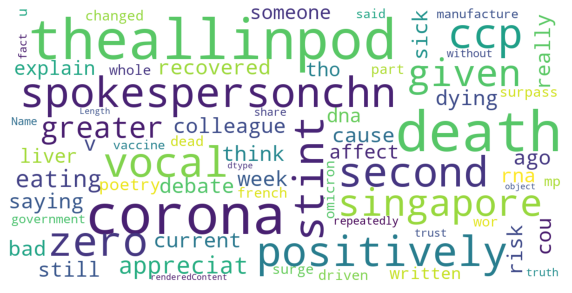

In [8]:
show_wordcloud(df["renderedContent"])

In [9]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [10]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['spokespersonchn', 'ccp', 'also', 'positively', 'vocal', 'zero', 'protection', 'send', 'million', 'furnace']


## Building Bi-gram and Tri-gram Models

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['spokespersonchn',
  'ccp',
  'also',
  'positively',
  'vocal',
  'zero',
  'protection',
  'send',
  'million',
  'furnace'],
 ['second',
  'stint',
  'singapore',
  'given',
  'greater',
  'appreciation',
  'intricate',
  'relationship',
  'unfortunately',
  'visited',
  'malaysia',
  'time',
  'hard',
  'border',
  'singapore',
  'side',
  'feel',
  'like',
  'intense',
  'mix',
  'near',
  'far'],
 ['eating',
  'colleague',
  'recovered',
  'week',
  'ago',
  'still',
  'coughing',
  'catch',
  'golden',
  'shoe',
  'chicken',
  'rice',
  'singapore'],
 ['theallinpod',
  'debate',
  'saying',
  'risk',
  'dying',
  'current',
  'variant',
  'low',
  'making',
  'lot',
  'le',
  'scary',
  'pharma',
  'co',
  'stop',
  'working',
  'govts',
  'large',
  'contract',
  'boost',
  'population',
  'free',
  'complete',
  'research'],
 ['theallinpod',
  'think',
  'really',
  'bad',
  'cause',
  'death',
  'sickness',
  'also',
  'true',
  'vaccine',
  'preventing',
  'getting',
  'sp

In [14]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['spokespersonchn',
  'ccp',
  'also',
  'positively',
  'vocal',
  'zero',
  'protection',
  'send',
  'million',
  'furnace'],
 ['second',
  'stint',
  'singapore',
  'given',
  'greater',
  'appreciation',
  'intricate',
  'relationship',
  'unfortunately',
  'visited',
  'malaysia',
  'time',
  'hard',
  'border',
  'singapore',
  'side',
  'feel',
  'like',
  'intense',
  'mix',
  'near',
  'far'],
 ['eating',
  'colleague',
  'recovered',
  'week',
  'ago',
  'still',
  'coughing',
  'catch',
  'golden',
  'shoe',
  'chicken',
  'rice',
  'singapore'],
 ['theallinpod',
  'debate',
  'saying',
  'risk',
  'dying',
  'current',
  'variant',
  'low',
  'making',
  'lot',
  'le',
  'scary',
  'pharma',
  'co',
  'stop',
  'working',
  'govts',
  'large',
  'contract',
  'boost',
  'population',
  'free',
  'complete',
  'research'],
 ['theallinpod',
  'think',
  'really',
  'bad',
  'cause',
  'death',
  'sickness',
  'also',
  'true',
  'vaccine',
  'preventing',
  'getting',
  'sp

## Building rough LDA model 

In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"like" + 0.010*"year" + 0.007*"china" + 0.006*"think" + '
  '0.005*"really" + 0.005*"day" + 0.004*"people" + 0.004*"got" + 0.004*"test" '
  '+ 0.004*"game"'),
 (1,
  '0.011*"singapore" + 0.011*"day" + 0.008*"one" + 0.008*"get" + 0.008*"got" + '
  '0.007*"time" + 0.006*"still" + 0.006*"infection" + 0.005*"issue" + '
  '0.004*"case"'),
 (2,
  '0.011*"people" + 0.010*"omicron" + 0.009*"singapore" + 0.008*"time" + '
  '0.008*"test" + 0.007*"positive" + 0.005*"still" + 0.005*"know" + '
  '0.005*"need" + 0.004*"home"'),
 (3,
  '0.010*"get" + 0.009*"singapore" + 0.006*"year" + 0.005*"well" + '
  '0.005*"people" + 0.004*"time" + 0.004*"first" + 0.004*"vaccine" + '
  '0.003*"still" + 0.003*"variant"'),
 (4,
  '0.032*"singapore" + 0.025*"new" + 0.023*"case" + 0.013*"death" + '
  '0.012*"report" + 0.006*"people" + 0.004*"get" + '
  '0.004*"omicron_infection_confirmed" + 0.004*"vaccine" + 0.004*"last"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.30117201323941406


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 01:39:42.662645
#Topics: 2, Score: 0.19484121432528395
#Topics: 3, Score: 0.2128119630542089
#Topics: 4, Score: 0.25314094496310174
#Topics: 5, Score: 0.28211374339799156
#Topics: 6, Score: 0.3003110901082157
#Topics: 7, Score: 0.27785175177528487
#Topics: 8, Score: 0.2912086513662729
#Topics: 9, Score: 0.35151054945641325
#Topics: 10, Score: 0.35537164586053727
#Topics: 11, Score: 0.3808671902791259
#Topics: 12, Score: 0.4000307124210913
#Topics: 13, Score: 0.37588726891149804
#Topics: 14, Score: 0.3805612820428204
#Topics: 15, Score: 0.39043116014569795
#Topics: 16, Score: 0.3859421417236427
#Topics: 17, Score: 0.4052178937160996
#Topics: 18, Score: 0.4300679082530973
#Topics: 19, Score: 0.4193854242768033
2023-03-12 01:41:17.010037


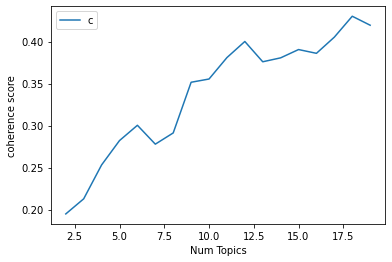

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [20]:
num_topics = 18

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [21]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("sg_acute_lda_model_18")
lda_model.save(lda_model_saved_file)

In [22]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.4540190897734491

In [25]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/sg_acute_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/sg_acute_lda_vis_tuned_'+ str(num_topics) +'.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.036990 -0.091038       1        1  8.120697
1      0.093808  0.069075       2        1  8.102545
3     -0.006690  0.125391       3        1  6.740737
11     0.026388 -0.006110       4        1  6.714434
5      0.086468 -0.022832       5        1  6.706654
16     0.021055 -0.069045       6        1  6.348183
17     0.048992 -0.083213       7        1  5.957710
13     0.016730 -0.105075       8        1  5.354006
14     0.028654 -0.006162       9        1  5.187888
12    -0.286752 -0.029690      10        1  5.167553
2     -0.068350 -0.075859      11        1  4.991698
6     -0.042178  0.046725      12        1  4.895768
10     0.007945  0.068824      13        1  4.783322
7      0.036486 -0.024878      14        1  4.780961
4      0.033456 -0.004668      15        1  4.763847
9      0.012385  0.061641      16        1  4.323052
0      0.009677  0.053171      17        1  3.807241
15    -0.055064  0.093742      18        1  3.253704, topic_info=           Term        Freq       Total Category  logprob  loglift
818        case  148.000000  148.000000  Default  30.0000  30.0000
93          new  160.000000  160.000000  Default  29.0000  29.0000
1242    omicron   86.000000   86.000000  Default  28.0000  28.0000
26    singapore  321.000000  321.000000  Default  27.0000  27.0000
70        death   77.000000   77.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1359        lah    3.635084   12.154605  Topic18  -5.3409   2.2183
26    singapore    6.689035  321.106160  Topic18  -4.7310  -0.4459
601         day    4.841692  104.906966  Topic18  -5.0543   0.3496
90    infection    4.166126   44.117208  Topic18  -5.2045   1.0655
77         need    4.097893   66.023731  Topic18  -5.2210   0.6458

[1107 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3832     10  0.644025  aappunjab
1593      7  0.758145         ac
4571      4  0.838787        act
4571      5  0.167757        act
4440     11  0.617147   activate
...     ...       ...        ...
9         5  0.046595       zero
9         6  0.046595       zero
9         8  0.326166       zero
9        15  0.046595       zero
9        18  0.046595       zero

[2794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 12, 6, 17, 18, 14, 15, 13, 3, 7, 11, 8, 5, 10, 1, 16])

**Added Sentiment Analysis**

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [24]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [25]:
df["renderedContent"] = df['renderedContent'].apply(lambda tweet:str(tweet))
sentiment_scores = df['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

0       {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...
1       {'neg': 0.127, 'neu': 0.5, 'pos': 0.373, 'comp...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.286, 'neu': 0.536, 'pos': 0.179, 'co...
4       {'neg': 0.336, 'neu': 0.519, 'pos': 0.144, 'co...
                              ...                        
1899    {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...
1900    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1901    {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp...
1902    {'neg': 0.532, 'neu': 0.468, 'pos': 0.0, 'comp...
1903    {'neg': 0.453, 'neu': 0.456, 'pos': 0.091, 'co...
Name: renderedContent, Length: 1904, dtype: object

In [26]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("sg_acute_lda_model_18")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

In [27]:
topics, num_topics = [], 18

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

[4,
 3,
 14,
 12,
 6,
 17,
 12,
 13,
 12,
 15,
 16,
 1,
 17,
 3,
 17,
 14,
 13,
 16,
 4,
 7,
 18,
 2,
 17,
 11,
 1,
 14,
 6,
 18,
 2,
 1,
 15,
 12,
 15,
 7,
 2,
 9,
 9,
 8,
 13,
 1,
 3,
 5,
 17,
 14,
 8,
 9,
 3,
 12,
 6,
 8,
 16,
 16,
 2,
 17,
 9,
 4,
 14,
 18,
 14,
 3,
 9,
 10,
 18,
 16,
 4,
 5,
 7,
 4,
 10,
 9,
 16,
 16,
 1,
 3,
 18,
 17,
 5,
 6,
 10,
 7,
 3,
 14,
 6,
 14,
 11,
 16,
 3,
 12,
 18,
 10,
 18,
 16,
 8,
 6,
 12,
 4,
 14,
 15,
 2,
 17,
 16,
 1,
 1,
 9,
 6,
 16,
 7,
 18,
 7,
 3,
 16,
 10,
 10,
 8,
 5,
 15,
 18,
 16,
 6,
 16,
 18,
 8,
 18,
 16,
 16,
 7,
 18,
 6,
 2,
 3,
 15,
 3,
 1,
 12,
 5,
 5,
 5,
 5,
 18,
 6,
 17,
 10,
 18,
 17,
 9,
 9,
 3,
 16,
 6,
 8,
 2,
 12,
 4,
 17,
 6,
 11,
 3,
 18,
 3,
 1,
 15,
 8,
 18,
 4,
 18,
 16,
 18,
 5,
 10,
 14,
 14,
 8,
 17,
 15,
 1,
 18,
 16,
 14,
 10,
 10,
 1,
 8,
 18,
 13,
 14,
 16,
 17,
 12,
 6,
 3,
 18,
 7,
 7,
 18,
 9,
 3,
 1,
 8,
 10,
 13,
 7,
 15,
 4,
 8,
 14,
 15,
 8,
 10,
 12,
 2,
 13,
 3,
 2,
 12,
 9,
 4,
 13,
 4,
 1,
 1,
 18,
 1

In [28]:
df["Topic"] = topics
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/TwiddyBird62/status/162022...,2023-01-31 00:46:59+00:00,spokespersonchn ccp also positively vocal zero...,spokespersonchn ccp also positively vocal zero...,1620222074311839746,https://twitter.com/TwiddyBird62,1,0,0,0,...,https://twitter.com/SpokespersonCHN,"[User(username='SpokespersonCHN', id=118369812...","Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,525.0,NaN,4
1,https://twitter.com/graham_euan/status/1620048...,2023-01-30 13:18:31+00:00,second stint singapore given greater appreciat...,second stint singapore given greater appreciat...,1620048815893131272,https://twitter.com/graham_euan,1,0,2,0,...,https://twitter.com/graham_euan,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,522.0,NaN,3
2,https://twitter.com/saintinc/status/1619912865...,2023-01-30 04:18:18+00:00,eating colleague recovered week ago still cou...,eating colleague recovered week ago still cou...,1619912865242120192,https://twitter.com/saintinc,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.85009281, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Joshua Seth | Golden Shoe C...,55.0,NaN,14
3,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 16:41:19+00:00,theallinpod debate saying risk dying current v...,theallinpod debate saying risk dying current v...,1619737462603145217,https://twitter.com/Mighty7693524,0,0,0,0,...,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,22.0,NaN,12
4,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 15:36:26+00:00,theallinpod think really bad cause death sick...,theallinpod think really bad cause death sick...,1619721134412546048,https://twitter.com/Mighty7693524,1,0,0,0,...,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,27.0,NaN,6


In [29]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/TwiddyBird62/status/162022...,2023-01-31 00:46:59+00:00,spokespersonchn ccp also positively vocal zero...,spokespersonchn ccp also positively vocal zero...,1620222074311839746,https://twitter.com/TwiddyBird62,1,0,0,0,...,"[User(username='SpokespersonCHN', id=118369812...","Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,525.0,NaN,4,Positive
1,https://twitter.com/graham_euan/status/1620048...,2023-01-30 13:18:31+00:00,second stint singapore given greater appreciat...,second stint singapore given greater appreciat...,1620048815893131272,https://twitter.com/graham_euan,1,0,2,0,...,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,522.0,NaN,3,Positive
2,https://twitter.com/saintinc/status/1619912865...,2023-01-30 04:18:18+00:00,eating colleague recovered week ago still cou...,eating colleague recovered week ago still cou...,1619912865242120192,https://twitter.com/saintinc,0,0,0,0,...,NaN,"Coordinates(longitude=103.85009281, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Joshua Seth | Golden Shoe C...,55.0,NaN,14,Neutral
3,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 16:41:19+00:00,theallinpod debate saying risk dying current v...,theallinpod debate saying risk dying current v...,1619737462603145217,https://twitter.com/Mighty7693524,0,0,0,0,...,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,22.0,NaN,12,Negative
4,https://twitter.com/Mighty7693524/status/16197...,2023-01-29 15:36:26+00:00,theallinpod think really bad cause death sick...,theallinpod think really bad cause death sick...,1619721134412546048,https://twitter.com/Mighty7693524,1,0,0,0,...,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,27.0,NaN,6,Negative


In [30]:
for content in df[(df["Topic"] == 17) & (df["Sentiment"] == "Negative")].renderedContent:
    print(content)

regime recognises massive economic slowdown effort ascribe slow growth  demon gst job crisis global technology political economy
agree others request way verify date video posted doubt situation dire would good know video  outbreak
went gym first time recovered  body messed managed run instead could weight lembek
guy know talk let u serious even kept mouth shut controversial story post  retweets club want association us platform spout utter shit different
netball tournament hit nervous nye tak boleh bincang 
simpletoned happening speak wage stagnating since year back worse reduced due  many fact look bnm slowly steadily increasing opr n usd rise usd debt baloon shitty lawmaker r busy arguing call pru
people dun understand difference scientific educated family v non scientific educated family tiring unequal live none scientific educated family half existence arguing kind belief system  thing
enjoyable session sgcancersociety staff orientation session first physical session since  singap

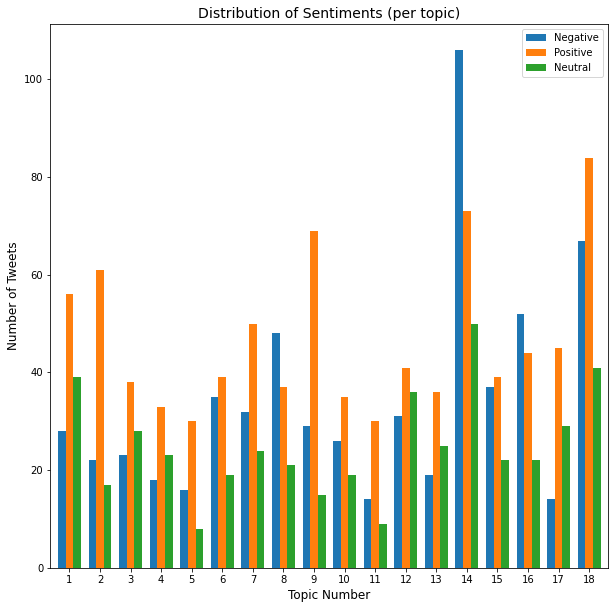

In [31]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()

### Label Topics - LDA

In [32]:
import yake

kw_extractor = yake.KeywordExtractor(top=10, stopwords=stopwords)

In [33]:
topic_keyphrases = dict()

for i in range(num_topics):
    tweets = " ".join(df[df["Topic"] == i+1].renderedContent)
    topic_keyphrases[i+1] = [kp[0] for kp in kw_extractor.extract_keywords(tweets)]

In [34]:
keyphrase_column_names = [f"Keyphrase {i}" for i in range(1, 11)]
topic_keyphrases_df = pd.DataFrame.from_dict(topic_keyphrases, orient="index", columns=keyphrase_column_names)
topic_keyphrases_df

,Keyphrase 1,Keyphrase 2,Keyphrase 3,Keyphrase 4,Keyphrase 5,Keyphrase 6,Keyphrase 7,Keyphrase 8,Keyphrase 9,Keyphrase 10
1,longer real goal,real goal china,commentary longer real,sad sad sad,death sad sad,still wearing mask,zero policy would,zero policy country,seen long two,wearing mask country
2,ahead weekend latest,weekend latest news,covered latest youtube,latest youtube video,latest news covered,news covered latest,weekend preview round,know ahead weekend,track side everything,youtube video link
3,lost sense taste,sense taste soon,minute lost sense,lost sense saltiness,lost sense smell,sense smell lost,smell lost sense,tinnitus lost sense,sense taste family,point lost sense
4,used face jinyao,face jinyao used,jinyao used face,face jinyao amazing,anymore used face,mrna affect dna,affect dna giving,would affect dna,affect dna thought,zero policy resigned
5,explains herd immunity,conquered celebrate antidote,fourth vaccine shot,celebrate antidote conquered,antidote conquered celebrate,murray explains herd,moreover explains herd,superadrianme conquered celebrate,herd immunity reached,herd immunity effective
6,catching still careful,causing heart attack,commentary catching still,wearing mask still,let whoever need,really really really,getting really suck,line defence paptinesnorth,sense smell taste,sgnftcreators mirlnft yeshh
7,make cheap version,flu always feel,zero policy thermopylaerip,dynamic zero policy,zero policy otherwise,adhere zero policy,zero policy patriotic,happened zero policy,cheap version pfizer,cheap version merck
8,brooklynnetcast bring back,malay language teacher,malay language tutor,touch add math,add math question,add math brain,sometimes feel like,life brooklynnetcast bring,opinion agree annngelkek,public transport haha
9,changi airport employee,another changi airport,preliminarily positive omicron,positive omicron variant,test preliminarily positive,employee test preliminarily,variant another changi,airport employee among,airport employee test,case preliminarily positive
10,south korea daily,new daily case,ctvnews south korea,case south korea,south korea report,abit hong kong,south korea look,jerram south korea,equal south korea,korea daily case
